<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [2]:
dataset = "vehicle_emissions_dataset"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

# start working with the data

In [3]:
df = pd.read_csv(dataset_url)
df.dtypes

timestep_time          float64
vehicle_co             float64
vehicle_co2            float64
vehicle_hc             float64
vehicle_nox            float64
vehicle_pmx            float64
vehicle_angle          float64
vehicle_eclass          object
vehicle_electricity    float64
vehicle_fuel           float64
vehicle_id              object
vehicle_lane            object
vehicle_noise          float64
vehicle_pos            float64
vehicle_route           object
vehicle_speed          float64
vehicle_type            object
vehicle_waiting        float64
vehicle_x              float64
vehicle_y              float64
vehicle_id_num           int64
__dt                    object
dtype: object

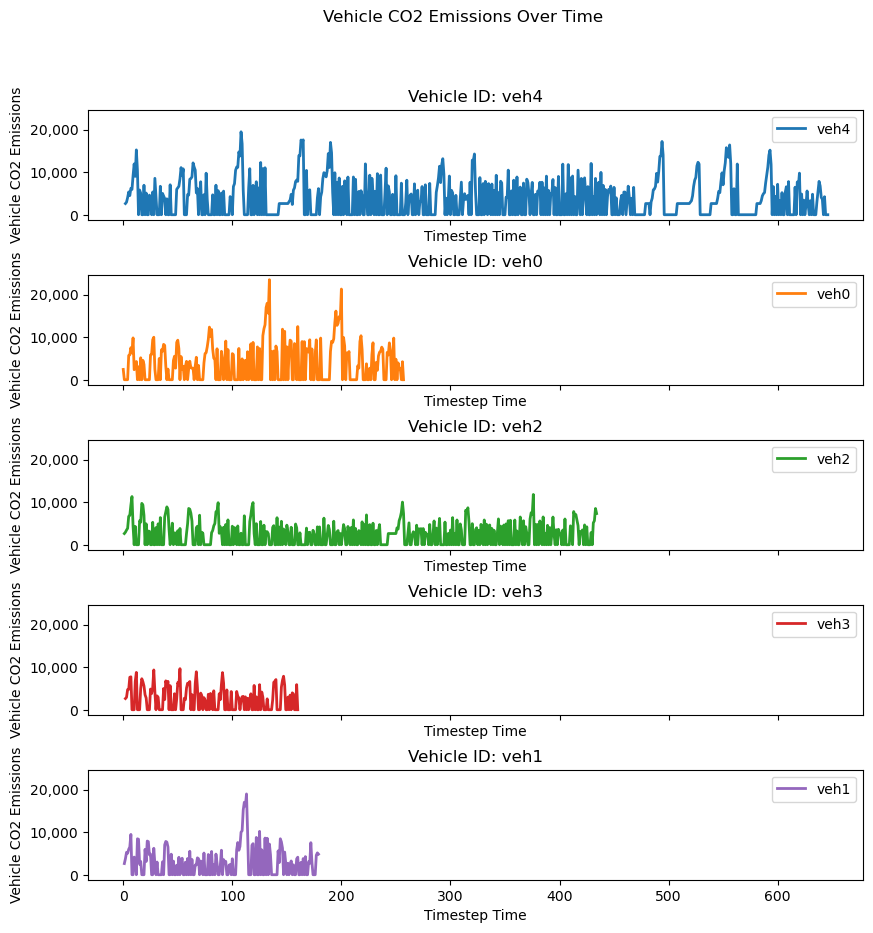

In [4]:
# Plot a line chart of the vehicle CO2 levels over time.

# create a figure and subplots
fig, axs = plt.subplots(len(df["vehicle_id"].unique()), 1, figsize=(10,10), sharex=True, sharey=True)

# iterate over each vehicle id and plot the data for that vehicle
for i, vehicle_id in enumerate(df["vehicle_id"].unique()):
    data = df.loc[df["vehicle_id"] == vehicle_id].sort_values("timestep_time")
    x = data["timestep_time"]
    y = data["vehicle_co2"]
    axs[i].plot(x, y, label=vehicle_id, linewidth=2, color="C{}".format(i))
    axs[i].set_title("Vehicle ID: {}".format(vehicle_id))
    axs[i].set_xlabel("Timestep Time")
    axs[i].set_ylabel("Vehicle CO2 Emissions")
    axs[i].legend()

# subplot spacing
plt.subplots_adjust(hspace=0.5)

# format the y-axis labels with commas
def format_func(value, tick_number):
    return "{:,.0f}".format(value)
for ax in axs.flat:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# set the plot title and axis labels for the entire figure
fig.suptitle("Vehicle CO2 Emissions Over Time")

# display the plot
plt.show()



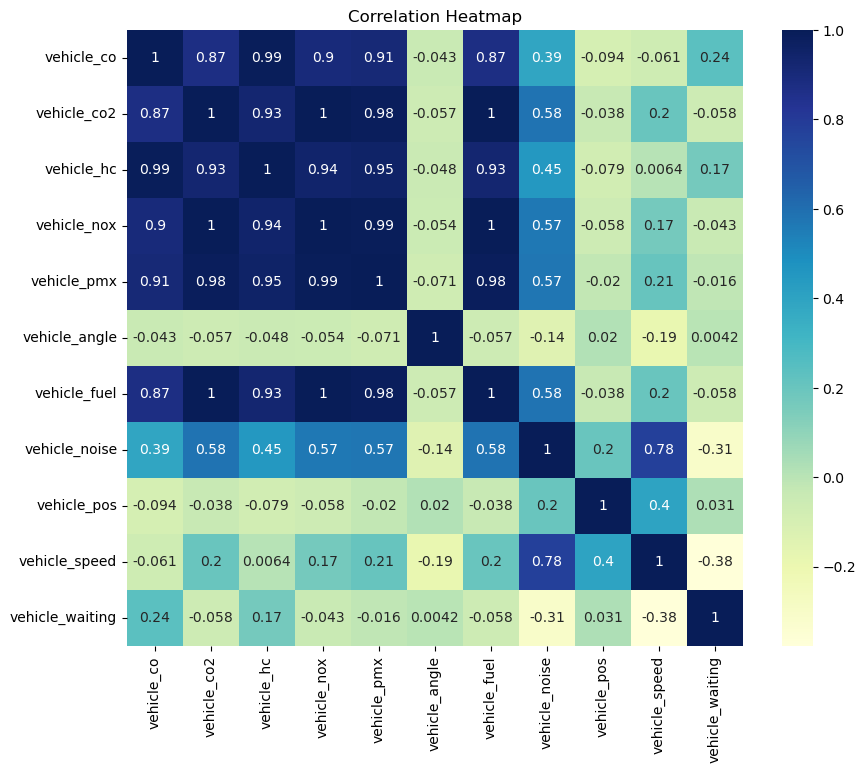

In [5]:
# select only the numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"])

# drop the columns that aren't as relevant or contain no interesting data
columns_to_exclude = ["vehicle_id_num","timestep_time","vehicle_electricity","vehicle_x","vehicle_y"]
numeric_cols = numeric_cols.drop(columns=columns_to_exclude)

# create the correlation matrix
corr_matrix = numeric_cols.corr()

# create the correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", square=True, ax=ax)

# set the plot title
plt.title("Correlation Heatmap")

# display the plot
plt.show()

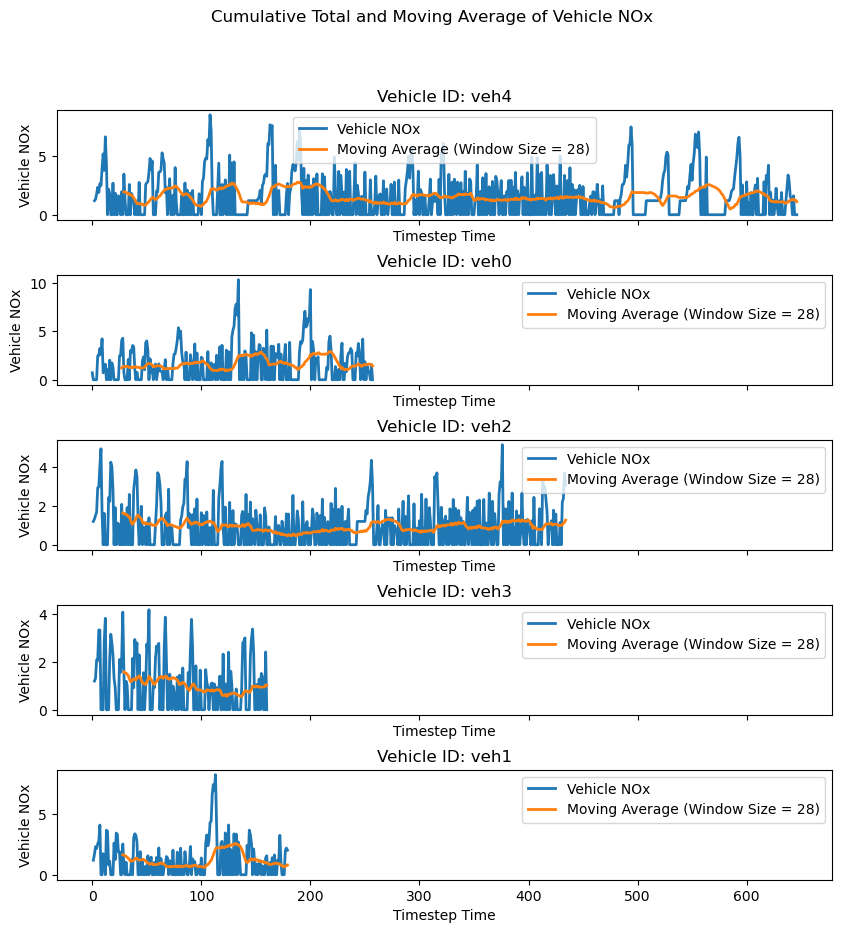

In [6]:
# define the window size for the moving average
window_size = 28

# create a figure and subplots
fig, axs = plt.subplots(len(df["vehicle_id"].unique()), 1, figsize=(10,10), sharex=True)

# iterate over each vehicle id and plot the data for that vehicle
for i, vehicle_id in enumerate(df["vehicle_id"].unique()):
    # select the data for the current vehicle id
    data = df.loc[df["vehicle_id"] == vehicle_id].sort_values("timestep_time")
    
    # calculate the cumulative sum of vehicle_nox
    vehicle_nox = data["vehicle_nox"]
    
    # calculate the rolling average of vehicle_nox
    rolling_avg = data["vehicle_nox"].rolling(window_size).mean()
    
    # plot the cumulative sum of vehicle_nox
    axs[i].plot(data["timestep_time"], vehicle_nox, label="Vehicle NOx", linewidth=2, color="C0")
    
    # plot the rolling average of vehicle_nox
    axs[i].plot(data["timestep_time"], rolling_avg, label="Moving Average (Window Size = {})".format(window_size), linewidth=2, color="C1")
    
    # set the plot title and axis labels for the current subplot
    axs[i].set_title("Vehicle ID: {}".format(vehicle_id))
    axs[i].set_xlabel("Timestep Time")
    axs[i].set_ylabel("Vehicle NOx")
    axs[i].legend()

# subplot spacing
plt.subplots_adjust(hspace=0.5)

# set the plot title and axis labels for the entire figure
fig.suptitle("Cumulative Total and Moving Average of Vehicle NOx")

# display the plot
plt.show()

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>